# MMA/MMAB 869 2024: Individual Assignment
- [Jose Chua]
- [20069208]
- [MMAS 2025]
- [Dec 8th 2024]

# Assignment Instructions

This assignment contains four questions. The questions are fully contained in this Google Colab Notebook.

You are to make a copy of this Notebook and edit the copy to provide your answers. You are to complete the assignment entirely within Google Colab. Why?

- It gives you practice using cloud-based interactive notebook environments (which is a popular workflow)
- It is easier for you to manage the environment (e.g., installing packages, etc.)
- Google Colab has nice, beefy machines, so you don't have to worry about running out of memory on your local computer.
- It will be easier for the TA to help you debug your code if you need help
- It will be easier for the TA to mark/run your code

Some parts of this assigment require you to write code. Use Python or R. For Python, you may use standard Python libraries, including `scikit-learn`, `pandas`, `numpy`, and `scipy`. For R, you may use `dplyr`, `caret`, `ggplot2`, `rpart` and other standard libraries.

Some parts of this assignment require text responses. In these cases, type your response in the Notebook cell indicated. Use English. Use proper grammar, spelling, and punctuation. Be professional and clear. Be complete, but not overly-verbose. Feel free to use [Markdown syntax](https://www.markdownguide.org/basic-syntax/) to format your answer (i.e., add bold, italics, lists, tables).

## What to Submit to the Course Portal

- Export your completed Notebook as a PDF file by clicking File->Print->Save as PDF.
- Please do not submit the Notebook file (`.ipynb`) to the course portal.
- Please submit the PDF export of the Notebook.
   - Please name the PDF file `2024_869_FirstnameLastName.pdf`
      - E.g., `869_NasrinYousefi.pdf`
   - Please make sure you have run all the cells so we can see the output!
   - Best practice: Before exporting to PDF click Runtime->Restart and run all.



# Preliminaries: Inspect and Set up environment

No action is required on your part in this section. These cells print out helpful information about the environment, just in case.

In [1]:
import datetime
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import fcluster
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, roc_auc_score
from sklearn.decomposition import PCA


In [2]:
print(datetime.now())

2024-12-08 17:56:35.740144


In [3]:
!which python

'which' is not recognized as an internal or external command,
operable program or batch file.


In [4]:
!python --version

Python 3.12.3


In [5]:
!echo $PYTHONPATH

$PYTHONPATH


In [6]:
# TODO: install any packages you need to here. For example:
#pip install unidecode


# Question 1: Uncle Steve's Diamonds

## Instructions

You work at a local jewelry store named *Uncle Steve's Diamonds*. You started as a janitor, but you’ve recently been promoted to senior data analyst. Congratulations!

Uncle Steve, the store's owner, needs to better understand the store's customers. In particular, he wants to know what kind of customers shop at the store. He wants to know the main types of *customer personas*. Once he knows these, he will contemplate ways to better market to each persona, better satisfy each persona, better cater to each persona, increase the loyalty of each persona, etc. But first, he must know the personas.

You want to help Uncle Steve. Using sneaky magic (and the help of Environics), you've collected four useful features for a subset of the customers: age, income, spending score (i.e., a score based on how much they’ve spent at the store in total), and savings (i.e., how much money they have in their bank account).

**Your tasks**

1. Pick a clustering algorithm (the [`sklearn.cluster`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.cluster) module has many good choices, including [`KMeans`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans), [`DBSCAN`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html#sklearn.cluster.DBSCAN), and [`AgglomerativeClustering`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering) (aka Hierarchical)). (Note that another popular implementation of the hierarchical algorithm can be found in SciPy's [`scipy.cluster.hierarchy.linkage`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html).) Don't spend a lot of time thinking about which algorithm to choose - just pick one. Cluster the customers as best as you can, within reason. That is, try different feature preprocessing steps, hyperparameter values, and/or distance metrics. You don't need to try every posssible combination, but try a few at least. Measure how good each  model configuration is by calculating an internal validation metric (e.g., [`calinski_harabasz_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.calinski_harabasz_score.html) or [`silhouette_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html#sklearn.metrics.silhouette_score)).
2. You have some doubts - you're not sure if the algorithm you chose in part 1 is the best algorithm for this dataset/problem. Neither is Uncle Steve. So, choose a different algorithm (any!) and do it all again.
3. Which clustering algorithm is "better" in this case? Think about charateristics of the algorithm like quality of results, ease of use, speed, interpretability, etc. Choose a "winner" and justify to Uncle Steve.
4. Interpret the clusters of the winning model. That is, describe, in words, a *persona* that accurately depicts each cluster. Use statistics (e.g., cluster means/distributions), examples (e.g., exemplar instances from each cluster), and/or visualizations (e.g., relative importance plots, snakeplots) to get started. Human judgement and creativity will be necessary. This is where it all comes together. Be descriptive and *help Uncle Steve understand his customers better*. Please!

**Marking**

The coding parts (i.e., 1 and 2) will be marked based on:

- *Correctness*. Code clearly and fully performs the task specified.
- *Reproducibility*. Code is fully reproducible. I.e., you (and I) are able to run this Notebook again and again, from top to bottom, and get the same results each time.
- *Style*. Code is organized. All parts commented with clear reasoning and rationale. No old code laying around. Code easy to follow.


Parts 3 and 4 will be marked on:

- *Quality*. Response is well-justified and convincing. Responses uses facts and data where possible.
- *Style*. Response uses proper grammar, spelling, and punctuation. Response is clear and professional. Response is complete, but not overly-verbose. Response follows length guidelines.


**Tips**

- Since clustering is an unsupervised ML technique, you don't need to split the data into training/validation/test or anything like that. Phew!
- On the flip side, since clustering is unsupervised, you will never know the "true" clusters, and so you will never know if a given algorithm is "correct." There really is no notion of "correctness" - only "usefullness."
- Many online clustering tutorials (including some from Uncle Steve) create flashy visualizations of the clusters by plotting the instances on a 2-D graph and coloring each point by the cluster ID. This is really nice and all, but it can only work if your dataset only has exactly two features - no more, no less. This dataset has more than two features, so you cannot use this technique. (But that's OK - you don't need to use this technique.)
- Must you use all four features in the clustering? Not necessarily, no. But "throwing away" quality data, for no reason, is unlikely to improve a model.
- Some people have success applying a dimensionality reduction technique (like [`sklearn.decomposition.PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)) to the features before clustering. You may do this if you wish, although it may not be as helpful in this case because there are only four features to begin with.
- If you apply a transformation (e.g., [`MinMaxScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) or [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler)) to the features before clustering, you may have difficulty interpretting the means of the clusters (e.g., what is a mean Age of 0.2234??). There are two options to fix this: first, you can always reverse a transformation with the `inverse_transform` method. Second, you can just use the original dataset (i.e., before any preprocessing) during the interpreation step.
- You cannot change the distance metric for K-Means. (This is for theoretical reasons: K-Means only works/makes sense with Euclidean distance.)


## 1.0: Load data

In [7]:
# DO NOT MODIFY THIS CELL
df1 = pd.read_csv("https://drive.google.com/uc?export=download&id=1thHDCwQK3GijytoSSZNekAsItN_FGHtm")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            505 non-null    int64  
 1   Income         505 non-null    int64  
 2   SpendingScore  505 non-null    float64
 3   Savings        505 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 15.9 KB


## 1.1: Clustering Algorithm #1: K-means

In [8]:
df1.head(10)

,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130
5,29,131578,0.847034,3535.514352
6,54,76500,0.785198,6878.884249
7,87,42592,0.355290,18086.287158
8,83,34384,0.324719,14783.379086
9,84,27693,0.367063,17879.558906


In [9]:
#preprocessing
scaler = StandardScaler()
x = scaler.fit_transform(df1)

In [10]:
k_means= KMeans(init='k-means++',n_clusters=4,n_init=10,random_state=42)
k_means.fit(x)
labels=k_means.labels_

In [11]:
#eval metrics
from sklearn.metrics import silhouette_score, calinski_harabasz_score
sil_score=silhouette_score (x,labels)
cal_score = calinski_harabasz_score(x,labels)

print('K Means Clustering Evaluation')
print(f'Silhouette Score: {sil_score}')
print(f'Calinski-Harabasz Score: {cal_score}')

K Means Clustering Evaluation
Silhouette Score: 0.7581191889903789
Calinski-Harabasz Score: 1611.2647365421865


In [12]:
#labels
df1['clusters'] = labels

In [13]:
K_means_centers=scaler.inverse_transform(k_means.cluster_centers_)
kmeans_centers_df = pd.DataFrame(K_means_centers,columns=df1.columns[:-1])
print("\nKMeans Cluster Centers")
print(kmeans_centers_df)


KMeans Cluster Centers
         Age         Income  SpendingScore       Savings
0  59.955414   72448.063694       0.771518   6889.972190
1  87.775510   27866.102041       0.328800  16659.261445
2  41.589404  107695.980132       0.269935  14937.265769
3  24.180000  128029.120000       0.896892   4087.520309


        Age    Income  SpendingScore   Savings
0  0.498230 -0.470772      -0.485166  0.542914
1  0.474171 -0.545684       0.553190 -0.413970
K Means Clustering Evaluation
Silhouette Score: 0.7581191889903789
Calinski-Harabasz Score: 1611.2647365421865


C:\Users\Jose Chua\AppData\Local\Temp\ipykernel_20396\2349361224.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


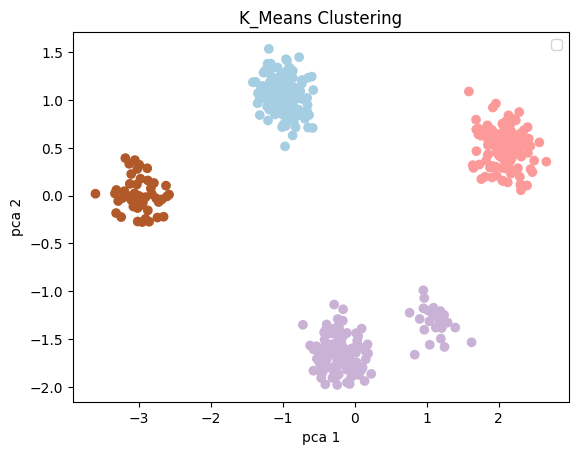

In [14]:
#plotting
pca = PCA(n_components=2)
pca_data = pca.fit_transform(x)

plt.scatter(pca_data[:,0],pca_data[:,1],c=labels,cmap='Paired')
plt.title('K_Means Clustering')
plt.xlabel('pca 1')
plt.ylabel('pca 2')
plt.legend()


#seeing the PCAs
components_df = pd.DataFrame(
    pca.components_, 
    columns=df1.columns[:pca.components_.shape[1]]
)
print(components_df)

print('K Means Clustering Evaluation')
print(f'Silhouette Score: {sil_score}')
print(f'Calinski-Harabasz Score: {cal_score}')

## 1.3: Clustering Algorithm #Hierarchical 

In [15]:
#Perform hierarchical clustering
h= linkage(x,method='ward',metric='euclidean')

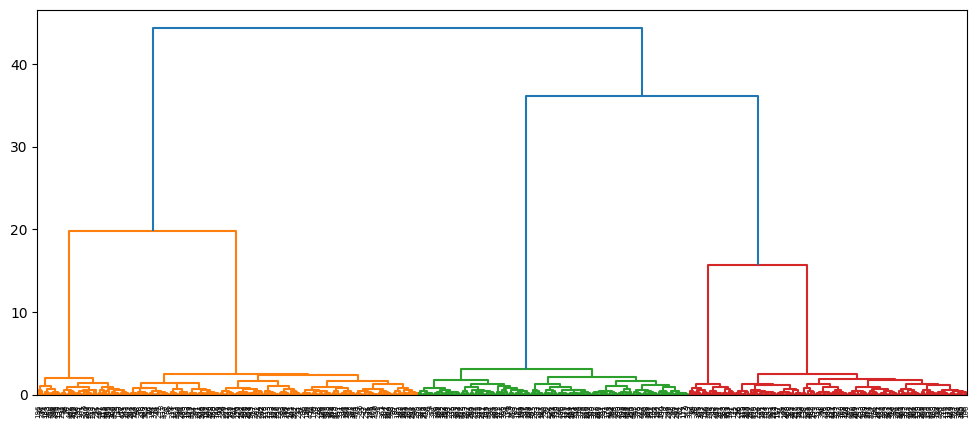

In [16]:
plt.figure(figsize=(12,5));
dendrogram(h);

In [17]:
from scipy.cluster.hierarchy import fcluster

h_labels = fcluster(h, t=4, criterion='maxclust')
df1['Cluster'] = fcluster(h,t= 4, criterion='maxclust')
df1.groupby('Cluster').mean()

,Age,Income,SpendingScore,Savings,clusters
Cluster,,,,,
1,24.180000,128029.120000,0.896892,4087.520309,3.0
2,59.955414,72448.063694,0.771518,6889.972190,0.0
3,87.775510,27866.102041,0.328800,16659.261445,1.0
4,41.589404,107695.980132,0.269935,14937.265769,2.0


In [18]:
h_sil_score=silhouette_score(x,h_labels)
h_cal_score=calinski_harabasz_score(x,h_labels)
print(f"Silhouette Score: {h_sil_score}")
print(f"Calinski-Harabasz Score: {h_cal_score}")

Silhouette Score: 0.7581191889903789
Calinski-Harabasz Score: 1611.2647365421865


## 1.3 Model Comparison

**Clustering Results:**

**Hierarchical Clustering:**

Cluster averages (Age, Income, SpendingScore, and Savings) show distinct groups with different profiles.
The dendrogram provides a visual representation of the hierarchical relationships, showing how clusters were formed and can be merged/split.
Provides a more intuitive grouping based on the hierarchy of the data.

**K-Means Clustering:**

Cluster centers (principal components) show how data points are grouped in the PCA-reduced space.
The scatter plot of PCA components highlights well-separated clusters, indicating K-Means was effective in finding compact clusters.
Relies heavily on the number of clusters (k=4) being predefined.

**Evaluation**

Both methods have the same Silhouette Score: 0.7581 and the same Calinski-Harabasz Score: 1611.26.
This indicates that the clusters are well-separated for both methods and good clustering performance with a high ratio of between-cluster variance to within-cluster variance.

**Recommendation**

Between the two clustering algorithms I would choose K-Means

Scalability:
K-Means is computationally efficient and scales well to large datasets, making it practical for many real-world scenarios.

Simplicity:
The algorithm is easy to implement and understand.
It provides intuitive results as it minimizes the variance within clusters.

Suitability for Well-Separated Clusters:
K-Means works well when the dataset has clearly separated clusters with spherical shapes (clusters that are roughly equally dense and compact).

Versatility in Applications:
Widely used in applications such as customer segmentation, market analysis, image compression, and more.
Its simplicity makes it easy to adapt and interpret for non-technical stakeholders.

Supports Dimensionality Reduction:
Combines well with PCA to reduce high-dimensional data into a format where clustering is more effective and easier to visualize.

## 1.4 Personas

**Cluster 0: Balanced Middle-Aged Professional**
- Age: 60 years
- Income: $72,448
- Spending Behavior: Moderate spender (Spending Score: 0.77).
- Savings: $6,890.
- Persona: This group consists of middle-aged professionals who have a decent income and a balanced approach to spending. They are financially stable but prioritize moderation in spending to maintain savings. They may be nearing retirement and value stability over extravagance.

**Cluster 1: The Frugal Senior** 
- Age: 88 years
- Income: $27,866
- Spending Behavior: Low spender (Spending Score: 0.33).
- Savings: $16,659.
- Persona: This group consists of older individuals, likely retirees, who live on a lower fixed income but maintain substantial savings. They spend cautiously and prioritize financial security. They may focus on essentials and avoid unnecessary expenses.

**Cluster 2: The Career-Oriented Saver**
- Age: 42 years
- Income: $107,696
- Spending Behavior: Low spender (Spending Score: 0.27).
- Savings: $14,937.
- Persona: This group represents career-driven individuals in their prime earning years. Despite their high income, they have a conservative approach to spending, focusing on growing their savings. They may prioritize long-term goals, such as buying property or investing.

**Cluster 3: Yuppies**
- Age: 24 years
- Income: $128,029
- Spending Behavior: High spender (Spending Score: 0.90).
- Savings: $4,088.
- Persona: This group consists of young, high-earning individuals who enjoy spending and are less focused on saving. They may prioritize lifestyle and experiences, often spending on luxury or leisure. They are likely early in their careers and see wealth accumulation as a long-term goal.

# Question 2: Uncle Steve's Fine Foods

## Instructions

Uncle Steve runs a small, local grocery store in Ontario. The store sells all the normal food staples (e.g., bread, milk, cheese, eggs, more cheese, fruits, vegatables, meat, fish, waffles, ice cream, pasta, cereals, drinks), personal care products (e.g., toothpaste, shampoo, hair goo), medicine, and cakes. There's even a little section with flowers and greeting cards! Normal people shop here, and buy normal things in the normal way.

Business is OK but Uncle Steve wants more. He's thus on the hunt for customer insights. Given your success at the jewelry store, he has asked you to help him out.

He has given you a few years' worth of customer transactions, i.e., sets of items that customers have purchased. You have applied an association rules learning algorithm (like Apriori) to the data, and the algorithm has generated a large set of association rules of the form `{X} -> {Y}`, where `{X}` and `{Y}` are item-sets.

Now comes a thought experiment. For each of the following scenarios, state what one of the discovered association rules might be that would meet the stated condition. (Just make up the rule, using your human experience and intuition.) Also, describe whether and why each rule would be considered interesting or uninteresting for Uncle Steve (i.e., is this insight new to him? Would he be able to use it somehow?).

Keep each answer to 600 characters or less (including spaces).

To get those brain juices going, an example condition and answer is provided below:

> Condition: A rule that has high support.

> Answer: The rule `{milk} -> {bread}` would have high support, since milk and bread are household staples and a high percentage of transactions would include both `{milk}` and `{bread}`. Uncle Steve would likely not find this rule interesting, because these items are so common, he would have surely already noticed that so many transactions contain them.

**Marking**

Your responses will be marked as follows:

- *Correctness*. Rule meets the specificed condition, and seems plausible in an Ontario grocery store.
- *Justification of interestness*. Response clearly describes whether and why the rule would be considered interesting to Uncle Steve.

**Tips**

- There is no actual data for this question. This question is just a thought exercise. You need to use your intuition, creatitivty, and understanding of the real world. I assume you are familiar with what happens inside of normal grocery stores. We are not using actual data and you do not need to create/generate/find any data. I repeat: there is no data for this question.
- The reason this question is having you do a thought experiment, rather than writing and running code to find actual association rules on an actual dataset, is because writing code to find association rules is actually pretty easy. But using your brain to come up with rules that meet certain criteria, on the other hand, is a true test of whether you understand how the algorithm works, what support and confidence mean, and the applicability of rules. The question uses the grocery store context because most, if not all, students should be familiar from personal experience.



## 2.1: A rule that might have high support and high confidence.

{Bread, Milk -> Bacon}

Bread, Milk and Bacon would have both high support and high confidence because bread, milk, and eggs are common breakfast staples that are frequently purchased together. The high support indicates that a significant percentage of transactions include these items, while the high confidence reflects the strong likelihood that customers buying bread and milk will also buy eggs. However, this rule may not be particularly interesting to Uncle Steve because it is an obvious insight. As these items are breakfast staples, he likely already knows this from observing customer purchases.

## 2.2: A rule that might have reasonably high support but low confidence.

{pasta} → {wine}

Pasta and wine might have reasonably high support because pasta is a popular item purchased by many customers. However, the confidence of this rule would be low, as not all customers buying pasta also purchase wine. Some customers might pair pasta with other beverages like water or soft drinks, reducing the consistency of the relationship. This rule could still be somewhat interesting for Uncle Steve, as he might use it to create a promotional strategy, such as bundling pasta and wine together or offering discounts on wine when pasta is purchased, thereby encouraging additional sales.

## 2.3: A Rule that Might have Low Support and Low Confidence

{greeting cards} → {flowers}

Greeting cards and flowers would likely have both low support and low confidence. The support would be low because greeting cards and flowers may not be commonly bought together, as these items are typically purchased for specific occasions. Similarly, the confidence would also be low, as customers buying greeting cards might not always purchase flowers—they might only need the card for an occasion that doesn’t involve gifting flowers. This rule would not be very interesting or actionable for Uncle Steve because of its rarity and weak correlation, limiting its potential to drive business decisions.

## 2.4: A Rule with Low Support and High Confidence.

{medicine} → {tissues}

Medicine and tissues would have low support but high confidence. The support would be low because medicine purchases are relatively rare compared to other grocery items, as not everyone needs medicine regularly. However, the confidence would be high because customers who do buy medicine, especially for colds or allergies, are very likely to also buy tissues. This rule would be highly interesting to Uncle Steve, as it offers a valuable opportunity for targeted promotions. For example, he could create a bundled offer such as “Buy medicine and get tissues at a discount,” which could encourage customers to purchase both items and increase overall sales.

# Question 3: Uncle Steve's Credit Union

## Instructions

Uncle Steve has recently opened a new credit union in Kingston, named *Uncle Steve's Credit Union*. He plans to disrupt the local market by instaneously providing credit to customers.

The first step in Uncle Steve's master plan is to create a model to predict whether an application has *good risk* or *bad risk*. He has outsourced the creation of this model to you.

You are to create a classification model to predict whether a loan applicant has good risk or bad risk. You will use data  that Uncle Steve bought from another credit union (somewhere in Europe, he thinks?) that has around 6000 instances and a number of demographics features (e.g., `Sex`, `DateOfBirth`, `Married`), loan details (e.g., `Amount`, `Purpose`), credit history (e.g., number of loans), as well as an indicator (called `BadCredit` in the dataset) as to whether that person was a bad risk.


**Your tasks**

To examine the effects of the various ML stages, you are to create the model several times, each time adding more sophistication, and measuring how much the model improved (or not). In particular, you will:

0. Split the data in training and testing. Don't touch the testing data again, for any reason, until step 5. We are pretending that the testing data is "future, unseen data that our model won't see until production." I'm serious, don't touch it. I'm watching you!
1. Build a baseline model - no feature engineering, no feature selection, no hyperparameter tuning (just use the default settings), nothing fancy. (You may need to do some basic feature transformations, e.g., encoding of categorical features, or dropping of features you do not think will help or do not want to deal with yet.) Measure the performance using K-fold cross validation (recommended: [`sklearn.model_selection.cross_val_score`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html#sklearn.model_selection.cross_val_score)) on the training data. Use at least 5 folds, but more are better. Choose a [`scoring` parameter](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter) (i.e., classification metric) that you feel is appropriate for this task. Don't use accuracy. Print the mean score of your model.
2. Add a bit of feature engineering. The [`sklearn.preprocessing`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing) module contains many useful transformations. Engineer at least three new features. They don't need to be especially ground-breaking or complicated. Dimensionality reduction techniques like [`sklearn.decomposition.PCA`](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) are fair game but not required. (If you do use dimensionality reduction techniques, it would only count as "one" new feature for the purposes of this assignment, even though I realize that PCA creates many new "features" (i.e., principal components).) Re-train your baseline model. Measure performance. Compare to step 1.
3. Add feature selection. The [`sklearn.feature_selection`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection) has some algorithms for you to choose from. After selecting features, re-train your model, measure performance, and compare to step 2.
4. Add hyperparameter tuning. Make reasonable choices and try to find the best (or at least, better) hyperparameters for your estimator and/or transformers. It's probably a good idea to stop using `cross_val_score` at this point and start using [`sklearn.model_selection.GridSearchCV`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV) as it is specifically built for this purpose and is more convienient to use. Measure performance and compare to step 3.
5. Finally, using your findings from the previous steps, estimate how well your model will work in production. Use the testing data (our "future, unseen data") from step 0. Transform the data as appropriate (easy if you've built a pipeline, a little more difficult if not), use the model from step 4 to get predictions, and measure the performance. How well did we do?


**Marking**

Each part will be marked for:
- *Correctness*. Code clearly and fully performs the task specified.
- *Reproducibility*. Code is fully reproducible. I.e., you (and I) should be able to run this Notebook again and again, from top to bottom, and get the same results each and every time.
- *Style*. Code is organized. All parts commented with clear reasoning and rationale. No old code laying around. Code easy to follow.


**Tips**
- The origins of the dataset are a bit of a mystery. Assume the data set is recent (circa 2022) and up-to-date. Assume that column names are correct and accurate.
- You don't need to experiment with more than one algorithm/estimator. Just choose one (e.g., [`sklearn.tree.DecisionTreeClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier), [`sklearn.ensemble.RandomForestClassifier`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier), [`sklearn.linear_model.LogisticRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression), [`sklearn.svm.LinearSVC`](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC), whatever) and stick with it for this question.
- There is no minimum accuracy/precision/recall for this question. I.e., your mark will not be based on how good your model is. Rather, you mark will be based on good your process is.
- Watch out for data leakage and overfitting. In particular, be sure to `fit()` any estimators and transformers (collectively, *objects*) only to the training data, and then use the objects' `transform()` methods on both the training and testing data. [Data School](https://www.youtube.com/c/dataschool/featured) has a [helpful video](https://www.youtube.com/watch?v=g2XsZdwbCCs) about this. [Pipelines](https://www.youtube.com/watch?v=1Y6O9nCo0-I) are very helpful here and make your code shorter and more robust (at the expense of making it harder to understand), and I recommend using them, but they are not required for this assignment.
- Create as many code cells as you need. In general, each cell should do one "thing."
-	Don't print large volumes of output. E.g., don't do: `df.head(100)`




## 3.0: Load data and split

In [19]:
# DO NOT MODIFY THIS CELL

# First, we'll read the provided labeled training data
df3 = pd.read_csv("https://drive.google.com/uc?export=download&id=1wOhyCnvGeY4jplxI8lZ-bbYN3zLtickf")
df3.info()

from sklearn.model_selection import train_test_split

X = df3.drop('BadCredit', axis=1) #.select_dtypes(['number'])
y = df3['BadCredit']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   UserID             6000 non-null   object
 1   Sex                6000 non-null   object
 2   PreviousDefault    6000 non-null   int64 
 3   FirstName          6000 non-null   object
 4   LastName           6000 non-null   object
 5   NumberPets         6000 non-null   int64 
 6   PreviousAccounts   6000 non-null   int64 
 7   ResidenceDuration  6000 non-null   int64 
 8   Street             6000 non-null   object
 9   LicensePlate       6000 non-null   object
 10  BadCredit          6000 non-null   int64 
 11  Amount             6000 non-null   int64 
 12  Married            6000 non-null   int64 
 13  Duration           6000 non-null   int64 
 14  City               6000 non-null   object
 15  Purpose            6000 non-null   object
 16  DateOfBirth        6000 non-null   object


## 3.1: Baseline model

In [20]:
#Dropping columns
columns_to_drop = ['UserID','FirstName','LastName','Street','LicensePlate','City','DateOfBirth']

X_Train_Base = X_train.drop(columns=columns_to_drop,axis=1)
X_Test_Base = X_test.drop(columns=columns_to_drop,axis=1)


In [21]:
df3.head(10)

,UserID,Sex,PreviousDefault,FirstName,LastName,NumberPets,PreviousAccounts,ResidenceDuration,Street,LicensePlate,BadCredit,Amount,Married,Duration,City,Purpose,DateOfBirth
0,218-84-8180,F,0,Debra,Schaefer,2,3,1,503 Linda Locks,395C,0,3907,0,24,Port Keith,Vacation,1964-04-07
1,395-49-9764,M,0,Derek,Wright,0,1,1,969 Cox Dam Suite 101,UFZ 691,0,3235,0,12,Lake Debra,NewCar,1978-06-02
2,892-81-4890,F,0,Shannon,Smith,0,0,2,845 Kelly Estate,48A•281,0,3108,1,30,North Judithbury,NewCar,1972-03-18
3,081-11-7963,F,0,Christina,Brooks,2,1,3,809 Burns Creek,30Z J39,1,4014,1,36,Lake Chad,Other,1985-02-26
4,347-03-9639,M,0,Ralph,Anderson,1,5,1,248 Brandt Plains Apt. 465,71-Q331,1,3823,0,18,North Judithbury,Vacation,1983-08-08
5,827-53-3120,F,0,Adrienne,Zimmerman,0,0,1,10518 Joshua Oval,9R E9737,0,4110,1,36,East Jill,NewCar,1971-08-17
6,286-60-4093,F,0,Heather,Jenkins,0,0,4,106 Mcbride Coves,38G 7262,1,3726,0,36,Ericmouth,NewCar,1982-04-14
7,293-55-9106,M,0,Brent,Pearson,0,2,1,32677 Michelle Circle,ZMA 647,0,3288,1,18,Lake Debra,UsedCar,1973-10-31
8,610-09-3854,F,0,Cheryl,Robinson,2,2,2,805 Brendan Neck,121-QFBQ,0,3501,0,30,East Jessetown,Household,1978-04-13
9,324-97-1189,F,0,Lauren,Williams,0,3,1,9985 Harris Stravenue,247 HIM,0,3791,1,12,North Judithbury,NewCar,1971-06-12


In [22]:
#encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

categorical_columns=['Sex','Purpose']

#applying encoding 
for col in categorical_columns:
    X_Train_Base[col]=le.fit_transform(X_Train_Base[col])
    X_Test_Base[col]=le.fit_transform(X_Test_Base[col])

In [23]:
#baseline model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

base_model = RandomForestClassifier (random_state=42)

val = cross_val_score(base_model,X_Train_Base,y_train,cv=5,scoring='roc_auc')

print(f'Baseline Mean Random Forest AUC_ROC: {np.mean(val):.5f}')

Baseline Mean Random Forest AUC_ROC: 0.82037


## 3.2: Adding feature engineering

In [24]:
#Using original data for feature engineering

columns_to_drop2 = ['UserID','FirstName','LastName','Street','LicensePlate',]

X_Train_Base2 = X_train.copy()
X_Test_Base2 = X_test.copy()

X_Train_Base2 = X_Train_Base2.drop(columns=columns_to_drop2,axis=1)
X_Test_Base2 = X_Test_Base2.drop(columns=columns_to_drop2,axis=1)

#city average amount
city_group = X_Train_Base2.groupby('City')['Amount']
X_Train_Base2['CityAverageAmount'] = X_Train_Base2['City'].map(city_group.mean())
X_Test_Base2['CityAverageAmount'] = X_Test_Base2['City'].map(city_group.mean())

In [25]:
#applying one hot encoding 
X_Train_Base2 = pd.get_dummies(X_Train_Base2, columns=['Sex', 'Purpose', 'City'], drop_first=True)
X_Test_Base2 = pd.get_dummies(X_Test_Base2, columns=['Sex', 'Purpose', 'City'], drop_first=True)

In [26]:
#Age Feature
current_year=2022

#convert object to time series
X_Train_Base2['DateOfBirth'] = pd.to_datetime(X_Train_Base2['DateOfBirth'], errors='coerce')
X_Test_Base2['DateOfBirth'] = pd.to_datetime(X_Test_Base2['DateOfBirth'], errors='coerce')

#making age feature
X_Train_Base2['Age'] = current_year - X_Train_Base2['DateOfBirth'].dt.year
X_Test_Base2['Age'] = current_year - X_Test_Base2['DateOfBirth'].dt.year

#dropping date of birth
X_Train_Base2 = X_Train_Base2.drop(columns='DateOfBirth')
X_Test_Base2 = X_Test_Base2.drop(columns='DateOfBirth')

In [27]:
#Number of Dependants
X_Train_Base2['Dependants'] = X_Train_Base2['Married'] + X_Train_Base2['NumberPets']
X_Test_Base2['Dependants'] = X_Test_Base2['Married'] - X_Test_Base2['NumberPets']

In [28]:
#monthly payment 
X_Train_Base2['MonthlyPayment'] = X_Train_Base2['Amount']/X_Train_Base2['Duration']
X_Test_Base2['MonthlyPayment'] = X_Test_Base2['Amount']/X_Test_Base2['Duration']

In [29]:
#changing all my bools for consistency
bool_columns_train = X_Train_Base2.select_dtypes(include='bool').columns
bool_columns_test = X_Test_Base2.select_dtypes(include='bool').columns

X_Train_Base2[bool_columns_train]=X_Train_Base2[bool_columns_train].astype('int64')
X_Test_Base2[bool_columns_test]=X_Test_Base2[bool_columns_test].astype('int64')

#scaling
numeric_columns = ['NumberPets','PreviousAccounts','ResidenceDuration','Amount','Duration','CityAverageAmount','Age','Dependants','MonthlyPayment']

scaler = StandardScaler()

X_Train_Base2[numeric_columns] = scaler.fit_transform(X_Train_Base2[numeric_columns])
X_Test_Base2[numeric_columns] = scaler.fit_transform(X_Test_Base2[numeric_columns])

In [30]:
#retraining baseline model with feature engineering
base_model2 = RandomForestClassifier (random_state=42)

val2 = cross_val_score(base_model2,X_Train_Base2,y_train,cv=5,scoring='roc_auc')

print(f'Baseline Mean Random Forest AUC_ROC: {np.mean(val2):.5f}')

Baseline Mean Random Forest AUC_ROC: 0.90887


## 3.3: Adding feature selection

In [31]:
#univariate feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif, chi2

selector = SelectKBest(score_func=f_classif, k=15)

In [32]:
# Fit and transform
X_Train_Sel = selector.fit_transform(X_Train_Base2, y_train)
X_Test_Sel = selector.transform(X_Test_Base2)
# Use get_support() to get the selected feature mask
selected_mask = selector.get_support()

# Get selected feature names from the original DataFrame
selected_features = X_Train_Base2.columns[selected_mask]

# Print selected features
print(f"Selected Features: {selected_features.tolist()}")

Selected Features: ['PreviousDefault', 'ResidenceDuration', 'Amount', 'Married', 'Duration', 'CityAverageAmount', 'Purpose_Education', 'Purpose_Household', 'Purpose_NewCar', 'Purpose_Other', 'City_Port Jesseville', 'City_Port Keith', 'City_Ramirezstad', 'Age', 'Dependants']


In [33]:
#modelling with selected features
feature_selected=RandomForestClassifier(random_state=42)

cross_val_score_selected=cross_val_score(feature_selected,X_Train_Sel,y_train,cv=5,scoring='roc_auc')

print(f"feature selected roc-auc:{np.mean(cross_val_score_selected):.3f}")

feature selected roc-auc:0.910


## 3.4: Adding hyperparameter tuning

In [34]:
#defining hyperparameter grid
from sklearn.model_selection import GridSearchCV

parameter_grid = {
    'n_estimators':[100,200,300],
    'max_depth':[10,20,30,None],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4]
}


In [35]:
#grid search
grid_search =  GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=parameter_grid,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_Train_Sel,y_train)

print(f"Best Parameters:{grid_search.best_params_}")
print(f"Tuned Model ROC-AUC:{grid_search.best_score_:.3f}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters:{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Tuned Model ROC-AUC:0.919


## 3.5: Performance estimation on testing data

In [36]:
from sklearn.metrics import classification_report, roc_auc_score, f1_score
y_pred=grid_search.best_estimator_.predict_proba(X_Test_Sel)[:,1]

#testing data
test_results=roc_auc_score(y_test,y_pred)
print(f'final roc-auc on unseen testing data: {test_results:.4f}')

final roc-auc on unseen testing data: 0.9283


# Question 4: Uncle Steve's Wind Farm

## Instructions


Uncle Steve has invested in wind. He's built a BIG wind farm with a total of  700 turbines. He's been running the farm for a couple of years now and things are going well. He sells the power generated by the farm to the Kingston government and makes a tidy profit. And, of course, he has been gathering data about the turbines' operations.

One area of concern, however, is the cost of maintenece. While the turbines are fairly robust, it seems like one breaks/fails every couple of days. When a turbine fails, it usually costs around \$20,000 to repair it. Yikes!

Currently, Uncle Steve is not doing any preventative maintenance. He just waits until a turbine fails, and then he fixes it. But Uncle Steve has recently learned that if he services a turbine *before* it fails, it will only cost around $2,000.

Obviously, there is a potential to save a lot of money here. But first, Uncle Steve would need to figure out *which* turbines are about to fail. Uncle Steve being Uncle Steve, he wants to use ML to build a predictive maintenance model. The model will alert Uncle Steve to potential turbine failures before they happen, giving Uncle Steve a chance to perform an inspection on the turbine and then fix the turbine before it fails. Uncle Steve plans to run the model every morning. For all the turbines that the model predicts will fail, Uncle Steve will order an inspection (which cost a flat \$500, no matter if the turbine was in good health or not; the \$500 would not be part of the $2,000 service cost). For the rest of the turbines, Uncle Steve will do nothing.

Uncle Steve has used the last few year's worth of operation data to build and assess a model to predict which turbines will fail on any given day. (The data includes useful features like sensor readings, power output, weather, and many more, but those are not important for now.) In fact, he didn't stop there: he built and assessed two models. One model uses using deep learning (in this case, RNNs), and the other uses random forests.

He's tuned the bejeebers out of each model and is comfortable that he has found the best-performing version of each. Both models seem really good: both have accuracy scores > 99%. The RNN has better recall, but Uncle Steve is convinced that the random forest model will be better for him since it has better precision. Just to be sure, he has hired you to double check his calculations.

**Your task**

 Which model will save Uncle Steve more money? Justify.


In addition to the details above, here is the assessment of each model:

- Confusion matrix for the random forest:

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | 201 | 55 |
| **Actual No Fail**   | 50 | 255195 |

- Confusion matrix for the RNN:

|         | Predicted Fail           | Predicted No Fail  |
| ------------- |------------| -----:|
| **Actual Fail**      | 226 | 30 |
| **Actual No Fail**   | 1200 | 254045 |


**Marking**

- *Quality*. Response is well-justified and convincing.
- *Style*. Response uses proper grammar, spelling, and punctuation. Response is clear and professional. Response is complete, but not overly-verbose. Response follows length guidelines.



**Tips**

- Figure out how much Uncle Steve is currently (i.e., without any predictive maintinance models) paying in maintenance costs.
- Use the information provided above to create a cost matrix.
- Use the cost matrix and the confusion matrices to determine the costs of each model.
- The cost of an inspection is the same, no matter if the turbine is in good condition or is about to fail.
- If the inspection determines that a turbine is about to fail, then it will be fixed right then and there for the additional fee.
- For simplicity, assume the inspections are perfect: i.e., that inspecting a turbine will definitely catch any problems that might exist, and won't accidentally flag an otherwise-healthy turbine.



**Answer**

**Random Forest Costs**
True Positive Cost = 201 * (2000 + 500) = $502,500
False Negative Cost = 55 * 20,000 = $1,100,000
False Positive Cost = 50 * 500 = $25,000
True Negative Cost = 0

**RNN Costs**
True Positive Cost = 226 * (2000 + 500) = $565,000
False Negative Cost = 30 * 20,000 = $600,000
False Positive Cost = 1200 * 500 = $600,000
True Negative Cost = 0

**Comparirson**
RF Cost: $1,627,500
RNN Cost: $1,765,000 

The Random Forest model results in $137,500 less cost compared to the RNN model. While the RNN model has better recall (catches more failures), its significantly higher false positive rate increases the cost of unnecessary inspections. The Random Forest model strikes a better balance by reducing unnecessary inspections while still identifying a high number of actual failures.

Uncle Steve should choose the Random Forest model as it will save him $137,500 compared to the RNN model. This model offers a more cost-effective approach to predictive maintenance, balancing precision and recall to minimize overall costs.